In [29]:
# Climate Change Chatter from News Outlets and Social Media
# I obtained a dataset with over 100,000 urls of different news outlets. Of the categories social,

In [30]:
import requests
from bs4 import BeautifulSoup
import re
import nltk
import pandas as pd
import numpy as np

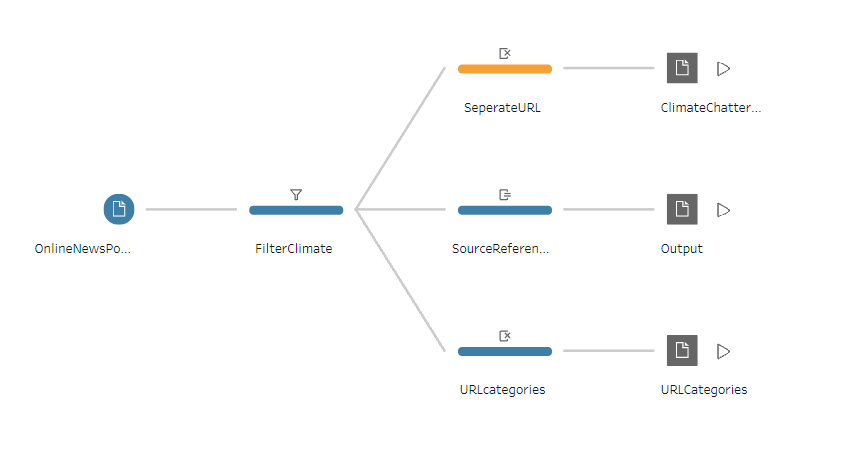

In [31]:
! pip install --upgrade pip

  Using cached pip-22.3.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\pip-22.0.4.dist-info\\entry_points.txt'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [32]:
! pip3 install PyPDF2

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [33]:
# importing required modules
import PyPDF2

In [34]:
def PDFmerge(pdfs, output):
	# creating pdf file merger object
	pdfMerger = PyPDF2.PdfFileMerger()

	# appending pdfs one by one
	for pdf in pdfs:
		pdfMerger.append(pdf)

	# writing combined pdf to output pdf file
	with open(output, 'wb') as f:
		pdfMerger.write(f)


def main():
	# pdf files to merge
	pdfs = ['example_1.pdf', 'example_2.pdf']

	# output pdf file name
	output = 'combined_example.pdf'

	# calling pdf merge function
	PDFmerge(pdfs=pdfs, output=output)


if __name__ == "__main__":
	# calling the main function
	main()


In [35]:
# Combining pdf files into one

main()

In [36]:
# Reading from the merged PDF documents
# creating a pdf file object
pdfFileObj = open('combined_example.pdf', 'rb')
  
# creating a pdf reader object
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
  
# printing number of pages in pdf file
print(pdfReader.numPages)
number_of_pages = pdfReader.numPages 
text_extracted = ""
final_text = ""    
for x in range(number_of_pages):
    # creating a page object
    pageObj = pdfReader.getPage(x)
    text_extracted = pageObj.extractText()
    final_text = final_text + text_extracted
    
  
# extracting text from page
print(final_text)
  
# closing the pdf file object
pdfFileObj.close()

26
 
• Home  
• Consulting  
• Magazine  
• Framework  
• Training  
• Staffing  
• VFP Conversion  
• Login  
REACT & JavaScript Developers  
CODE Consulting is currently accepting resumes  for various open positions for REACT & 
JavaScript web developers, ranging from junior to senior roles , to work on current and future 
development projects. We have multiple offerings for this position and will consider candidates 
who seek full -time employment or contracting opportunities. Remote work (you work from your 
home) is an option.  
Applicants may e nd up working on various projects over time, involving potentially different and 
evolving sets of technologies as needed for modern business applications and systems.  
Position #1: Team Lead & Senior Level 
Developer  
We are looking for a Senior Level JavaScr ipt developer who is proficient with React.js. Your primary 
focus will be on developing user interface components and implementing them following well -
known React.js workflows (

In [37]:
# Remove stopwords and tokenize text, to determine text importance (feature/word importance)

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
from nltk.tokenize import word_tokenize 
text_tokens_pdf = word_tokenize(final_text)

tokens_pdf_without_sw = [word for word in text_tokens_pdf if not word in stop_words]

  
print(tokens_pdf_without_sw)

['•', 'Home', '•', 'Consulting', '•', 'Magazine', '•', 'Framework', '•', 'Training', '•', 'Staffing', '•', 'VFP', 'Conversion', '•', 'Login', 'REACT', '&', 'JavaScript', 'Developers', 'CODE', 'Consulting', 'currently', 'accepting', 'resumes', 'various', 'open', 'positions', 'REACT', '&', 'JavaScript', 'web', 'developers', ',', 'ranging', 'junior', 'senior', 'roles', ',', 'work', 'current', 'future', 'development', 'projects', '.', 'We', 'multiple', 'offerings', 'position', 'consider', 'candidates', 'seek', 'full', '-time', 'employment', 'contracting', 'opportunities', '.', 'Remote', 'work', '(', 'work', 'home', ')', 'option', '.', 'Applicants', 'may', 'e', 'nd', 'working', 'various', 'projects', 'time', ',', 'involving', 'potentially', 'different', 'evolving', 'sets', 'technologies', 'needed', 'modern', 'business', 'applications', 'systems', '.', 'Position', '#', '1', ':', 'Team', 'Lead', '&', 'Senior', 'Level', 'Developer', 'We', 'looking', 'Senior', 'Level', 'JavaScr', 'ipt', 'develo

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\uosun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
# Remove Stem words
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer 
#lemmatizer = WordNetLemmatizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
lemmatizer_pdf_tokens = [lemmatizer.lemmatize(s) for s in tokens_pdf_without_sw]

print(lemmatizer_pdf_tokens)

['•', 'Home', '•', 'Consulting', '•', 'Magazine', '•', 'Framework', '•', 'Training', '•', 'Staffing', '•', 'VFP', 'Conversion', '•', 'Login', 'REACT', '&', 'JavaScript', 'Developers', 'CODE', 'Consulting', 'currently', 'accepting', 'resume', 'various', 'open', 'position', 'REACT', '&', 'JavaScript', 'web', 'developer', ',', 'ranging', 'junior', 'senior', 'role', ',', 'work', 'current', 'future', 'development', 'project', '.', 'We', 'multiple', 'offering', 'position', 'consider', 'candidate', 'seek', 'full', '-time', 'employment', 'contracting', 'opportunity', '.', 'Remote', 'work', '(', 'work', 'home', ')', 'option', '.', 'Applicants', 'may', 'e', 'nd', 'working', 'various', 'project', 'time', ',', 'involving', 'potentially', 'different', 'evolving', 'set', 'technology', 'needed', 'modern', 'business', 'application', 'system', '.', 'Position', '#', '1', ':', 'Team', 'Lead', '&', 'Senior', 'Level', 'Developer', 'We', 'looking', 'Senior', 'Level', 'JavaScr', 'ipt', 'developer', 'proficie

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(lemmatizer_pdf_tokens)
comments_pdf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


In [40]:
comments_pdf_df

,00,000,0000,0134,10,11,12,12373,125,129,...,wrong,www,year,yo,you,your,zero,zip,zone,zsh
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7649,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:

comments_pdf_df.sum().sort_values(ascending=False).head(20)

application    129
neh            117
project         78
may             56
gov             55
information     54
award           51
must            48
grants          45
if              43
applicant       43
federal         38
review          37
required        35
form            34
time            34
summer          34
work            34
funding         33
individual      32
dtype: int64

In [42]:
#print number of paragraphs of text extracted from all the relevant climate URLs

print(len(comments_pdf_df))

7653


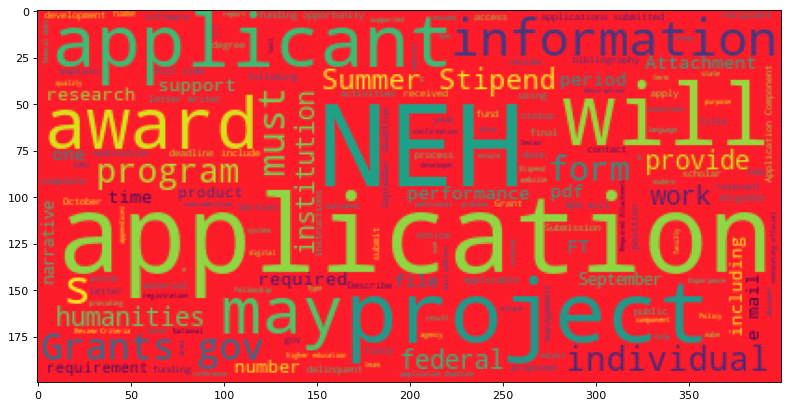

In [43]:
from matplotlib.pyplot import figure
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline
figure(figsize=(12, 12), dpi=80)
wordcloud = WordCloud(background_color='#ff1c2a').generate(final_text)

plt.imshow(wordcloud);
plt.savefig("wordClimateCloud.jpg")

In [44]:
# Determine feature Importance utilizing TF-IDF
# TF-IDF weight is composed by two terms: Term Frequency (TF)/ total no of words in that document;
# TF: Term Frequency, which measures how frequently a term occurs in a document.
# TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
# IDF: Inverse Document Frequency, which measures how important a term is. 
# IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',  max_features=30000)

result_pdf = np.array([final_text])
X = vectorizer.fit_transform(result_pdf)

tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df.mean().sort_values(ascending=False).head(20)

neh             0.401846
application     0.312547
project         0.199206
gov             0.188902
information     0.185467
grants          0.168294
applications    0.154556
applicants      0.147687
award           0.144252
federal         0.130514
review          0.123645
required        0.120210
summer          0.116776
funding         0.113341
time            0.113341
work            0.109907
stipends        0.109907
form            0.106472
research        0.106472
deadline        0.106472
dtype: float64

<AxesSubplot:title={'center':'Climate Chatter Words by TFID Importance'}, xlabel='Word', ylabel='Total TFID'>

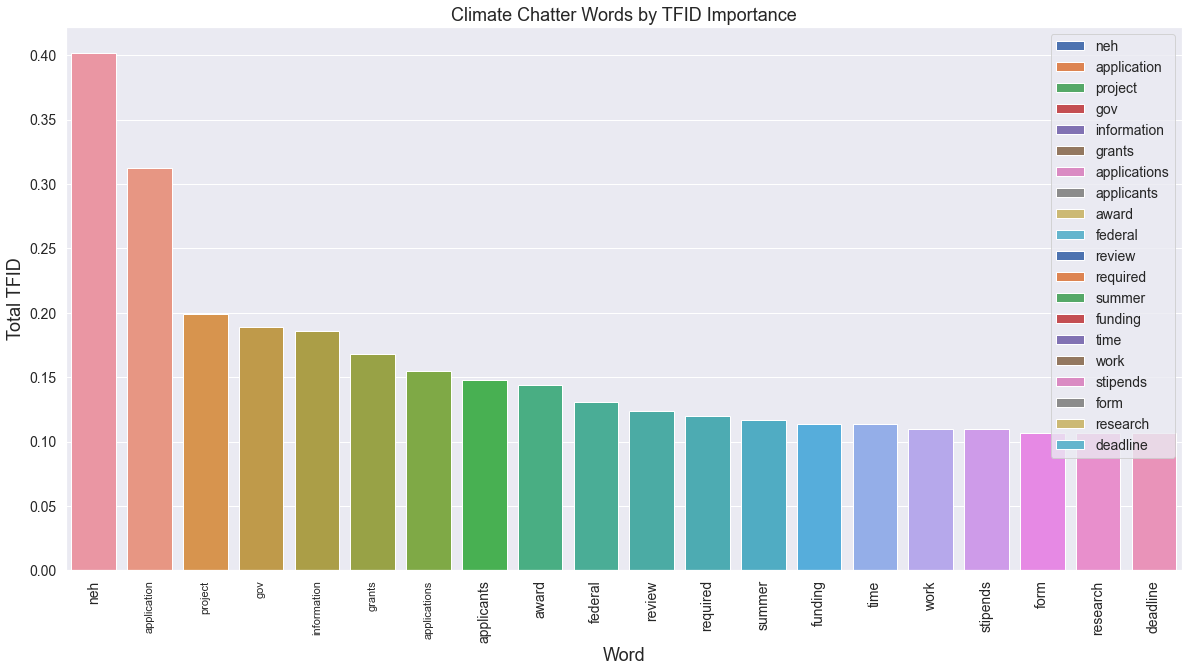

In [46]:
#seaborn components used: set_theme(), load_dataset(), lineplot()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set_theme(style="darkgrid")

# Accumulated TFID importance across all the documents
total_tfid = tfidf_df.sum().sort_values(ascending=False).head(20)
total_tfid.columns =['Feature']
df1 = pd.DataFrame(total_tfid)
total_df2=df1.transpose()
 
    
total_df2.plot(kind="bar",figsize=(20, 10))
plt.title("Climate Chatter Words by TFID Importance",fontsize = 18)
plt.xlabel("Word",fontsize = 18)
plt.ylabel("Total TFID",fontsize = 18)
plt.legend(fontsize = 14)
plt.xticks(fontsize =14)
plt.yticks(fontsize =14)
# Plot the feature importance
sns.barplot(data=total_df2)

<AxesSubplot:title={'center':'Climate Chatter Words by TFID Importance'}, xlabel='Word', ylabel='Mean TFID'>

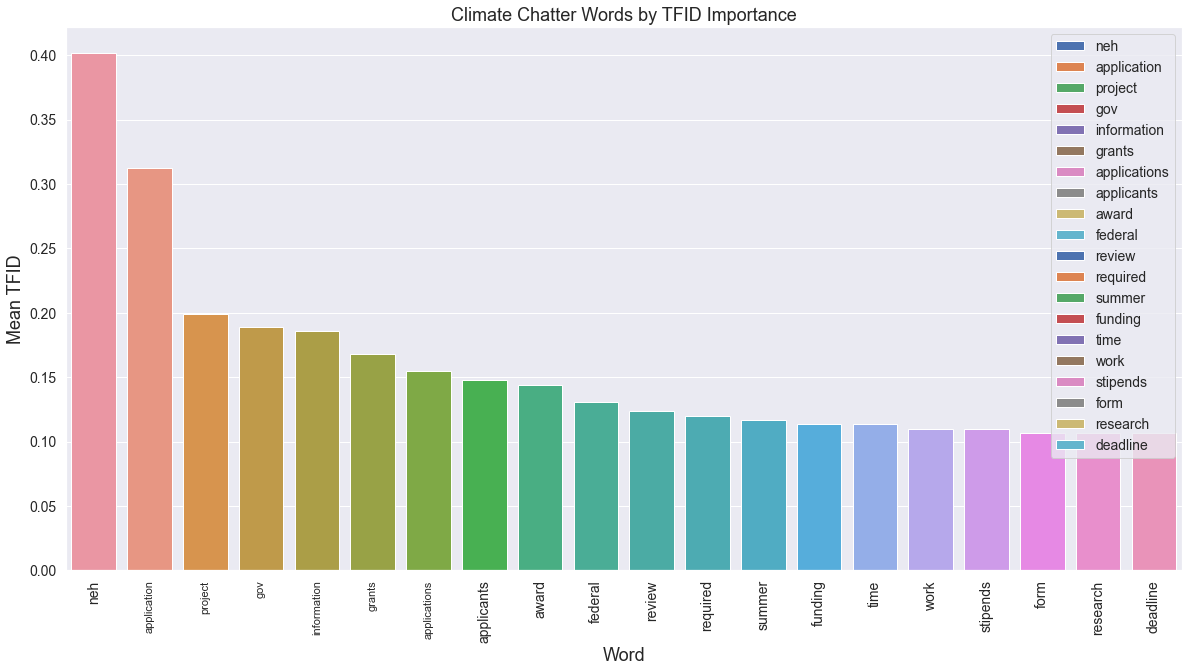

In [47]:

sns.set_theme(style="darkgrid")

# Accumulated TFID importance across all the documents
mean_tfid = tfidf_df.mean().sort_values(ascending=False).head(20)
mean_tfid.columns =['Feature']
df1 = pd.DataFrame(mean_tfid)
mean_df2=df1.transpose()
    
mean_df2.plot(kind="bar",figsize=(20, 10))
plt.title("Climate Chatter Words by TFID Importance",fontsize = 18)
plt.xlabel("Word",fontsize = 18)
plt.ylabel("Mean TFID",fontsize = 18)
plt.legend(fontsize = 14)
plt.xticks(fontsize =14)
plt.yticks(fontsize =14)
plt.savefig('wordMeanTFID.jpg')

# Plot the feature importance
sns.barplot(data=mean_df2)

In [48]:
 !pip install wordcloud

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


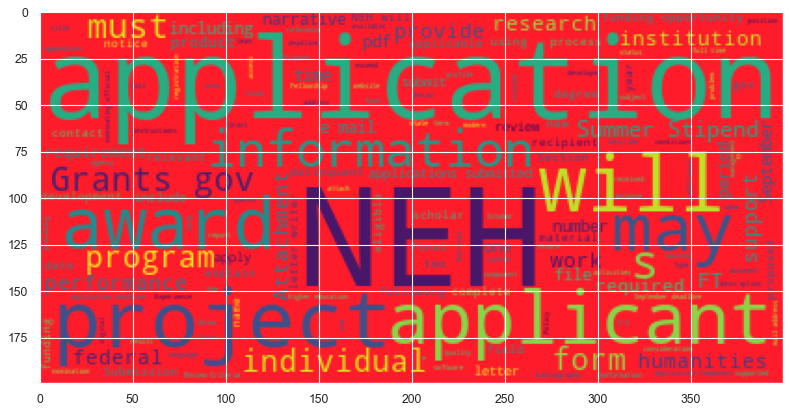

In [49]:
from matplotlib.pyplot import figure
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline
figure(figsize=(12, 12), dpi=80)
wordcloud = WordCloud(background_color='#ff1c2a').generate(final_text)

plt.imshow(wordcloud);
plt.savefig("wordClimateCloudPDF.jpg")
